**Dimension Reduction**

Let's analyze work of the following algorithms :
* UMAP
* TSNE
* PCA
* Truncated SVD

on the next data sets :
* PenDigits - is a set of 1797 grayscale images of digits entered using a digitiser tablet.
* MNIST - is a dataset of 28x28 pixel grayscale images of handwritten digits.
* Fashion MNIST - is a dataset of 28x28 pixel grayscale images of fashion items (clothing, footwear and bags). 
* Shuttle - is a NASA dataset consisting of various data associated to the positions of radiators in the space shule, including a timestamp.


In [ ]:
!pip install umap-learn

In [ ]:
# dependecies
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.manifold import TSNE
from sklearn.datasets import fetch_openml, load_digits

from umap import UMAP

import time

In [ ]:
# load datasets
pen_digits_x, pen_digits_y = load_digits(return_X_y=True)
mnist_x, mnist_y = fetch_openml(data_id=554, return_X_y=True)
fmnist_x, fmnist_y = fetch_openml(data_id=40996, return_X_y=True)
shuttle_x, shuttle_y = fetch_openml(data_id=40685, return_X_y=True)

In [ ]:
# form datasets order
datasets = [
    (pen_digits_x, pen_digits_y, 'Pen digits'),
    (shuttle_x, shuttle_y, 'Statlog (Shuttle)'),
    (mnist_x, mnist_y.astype(int), 'MNIST'),
    (fmnist_x, fmnist_y.astype(int), 'Fashion-MNIST')
]

In [ ]:
# print datasets size (optional)
for (x,y,d_name) in datasets:
  print(d_name, x.shape)

Pen digits (1797, 64)
Statlog (Shuttle) (58000, 9)
MNIST (70000, 784)
Fashion-MNIST (70000, 784)


In [ ]:
TSNE = TSNE(n_components=2)
UMAP = UMAP(n_components=2)
SVD = TruncatedSVD(n_components=2)
PCA = PCA(n_components=2)

In [ ]:

algos = [
    (PCA, 'PCA'),
    (SVD, 'SVD'),
    (UMAP, 'UMAP'),
    (TSNE, 't-SNE'),
]

done PCA Pen digits in 0.02367711067199707 sec
done PCA Statlog (Shuttle) in 0.10649299621582031 sec
done PCA MNIST in 5.889965534210205 sec
done PCA Fashion-MNIST in 4.035064458847046 sec
done SVD Pen digits in 0.014910221099853516 sec
done SVD Statlog (Shuttle) in 0.11305117607116699 sec
done SVD MNIST in 3.624055862426758 sec
done SVD Fashion-MNIST in 3.2043488025665283 sec
done UMAP Pen digits in 18.516974925994873 sec
done UMAP Statlog (Shuttle) in 145.23096346855164 sec
done UMAP MNIST in 82.20938086509705 sec
done UMAP Fashion-MNIST in 86.71189332008362 sec


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


done t-SNE Pen digits in 11.771660327911377 sec


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


done t-SNE Statlog (Shuttle) in 772.3937375545502 sec


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


done t-SNE MNIST in 1370.5787241458893 sec


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


done t-SNE Fashion-MNIST in 1468.0272834300995 sec


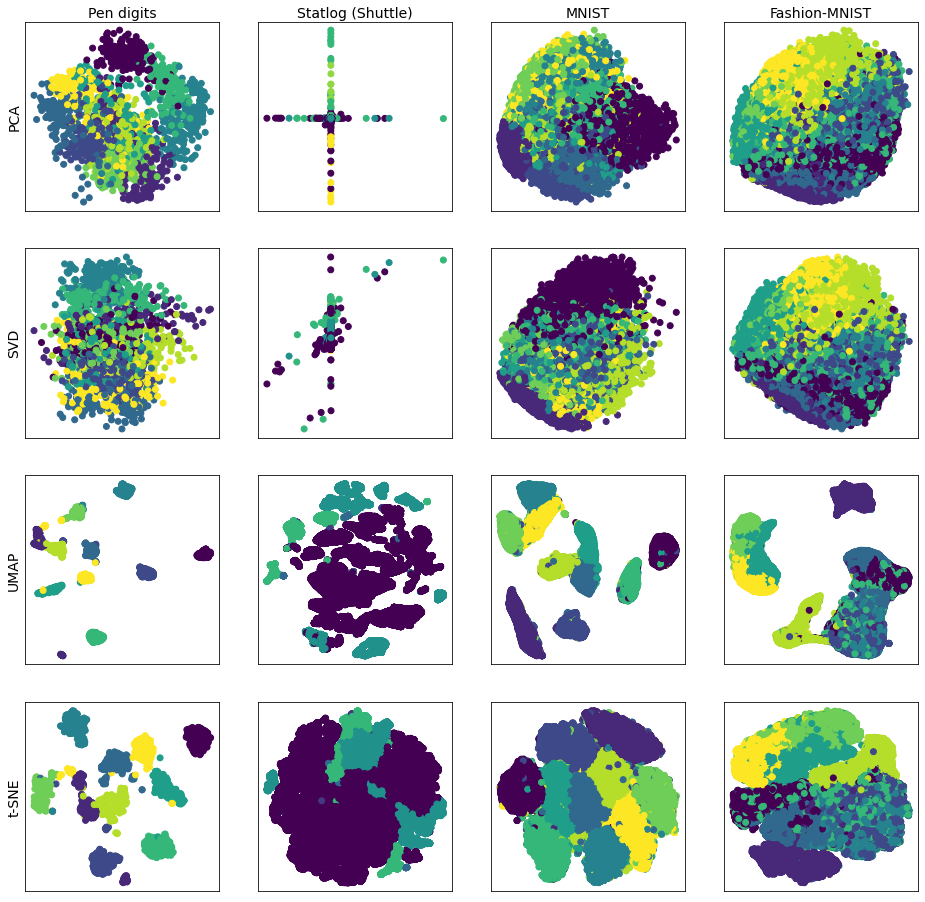

In [ ]:
fig, axs = plt.subplots(4, 4, figsize=(16, 16))
for i, (algo, a_name) in enumerate(algos):
    for j, (x, y, d_name) in enumerate(datasets):
        
        #time measure
        start_time = time.time()

        #axis naming
        if i == 0:
            axs[i, j].set_xlabel(f'{d_name}', fontsize=14) 
            axs[i, j].xaxis.set_label_position('top') 
        if j == 0:
            axs[i, j].set_ylabel(f'{a_name}', fontsize=14)
        
        embeddings = algo.fit_transform(x)

        axs[i, j].scatter(embeddings[:, 0], embeddings[:, 1], c=y.astype(int))
        axs[i, j].set_xticks([])
        axs[i, j].set_yticks([])


        print("done", a_name, d_name, "in", time.time()-start_time, "sec")
plt.show()

 **Results** 

As logs show PCA and SVD shows similar results for a short period of time.
UMAP and t-SME give better results but UMAP is much faster.
So UMAP is the best choice.
